# Spike only similarity

In [14]:
import numpy as np
from scipy.signal import medfilt
import scipy.stats as scs
import matplotlib.pyplot as plt
import gitInformation
from decimal import Decimal
from functions import similarity

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-23
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 5cc21247a4ac65506a1ea80a36e51ed5dd07261a
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

## Generate some data

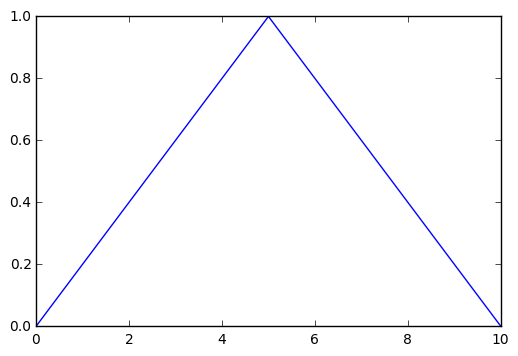

In [4]:
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri = tri/5.
plt.plot(tri)

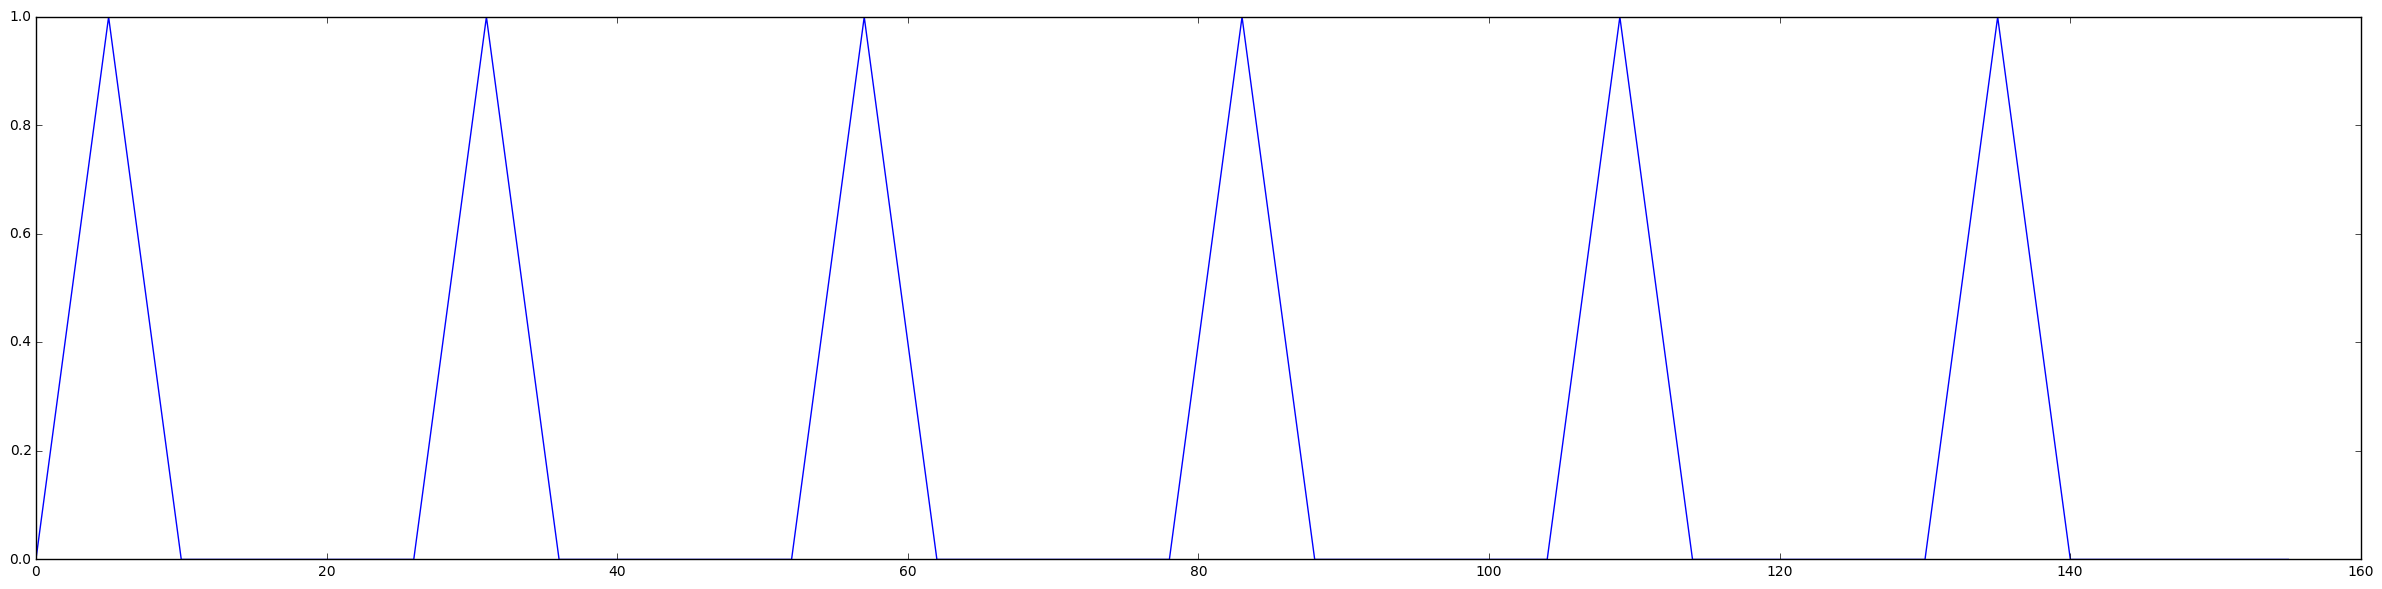

In [5]:
x = np.zeros(15)
data = np.append(tri,x)
for i in range(5):
    data = np.append(data,tri)
    data = np.append(data,x)
plt.figure(figsize=(30,7))
plt.plot(data)

## Calculate similaritiy

In [6]:
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35, 39, 45, 47, 51, 55, 57, 61, 75])
b = [0,26,52,78,78,104,130]


filtered = np.zeros((140, len(data)))
filtered_spikes = np.zeros((140, len(data)))
only_spikes = []


rms = np.zeros(140)
euclidean = np.zeros(140)
manhatten = np.zeros(140)
cosine = np.zeros(140)
jaccard = np.zeros(140)
corrCoef = np.zeros(140)

valuesRms = np.zeros(len(wl))
valuesEuclid = np.zeros(len(wl))
valuesManhatten = np.zeros(len(wl))
valuesCosine = np.zeros(len(wl))
valuesJaccard = np.zeros(len(wl))
valuesCorr = np.zeros(len(wl))

In [7]:
count = -1
sim = similarity()
for w in wl:
    count += 1
    for i in range(len(filtered)):
        data_noised = data + np.random.normal(0, 0.3, len(data))
        filtered[i,:] = medfilt(data_noised, w)
        filtered_spikes[i,:] = data_noised - filtered[i,:]
        temp = filtered_spikes[i,:]
        only_spikes = []
        only_spikes2 = []
        for p in b:
            only_spikes = np.append(only_spikes, temp[p:p+11])
            only_spikes2 = np.append(only_spikes2, data_noised[p:p+11])
            
        rms[i] = np.sqrt(np.mean(np.square(only_spikes)))
        euclidean[i] = sim.euclideanDistance(only_spikes, only_spikes2)
        manhatten[i] = sim.manhattanDistance(only_spikes,only_spikes2)
        cosine[i] = sim.cosineSimilarity(only_spikes, only_spikes2)
        jaccard[i] = sim.jaccardSimilarity(only_spikes,only_spikes2)
        cc = scs.pearsonr(only_spikes,only_spikes2)
        corrCoef[i] = cc[0]
        
        
    meanRms= np.mean(rms)
    meanEuclid= np.mean(euclidean)
    meanManhatten= np.mean(manhatten)
    meanCosine= np.mean(cosine)
    meanJaccard= np.mean(jaccard)
    meanCorr = np.mean(corrCoef)
    
    
    valuesRms[count] = meanRms
    valuesEuclid[count] = meanEuclid
    valuesManhatten[count] = meanManhatten  
    valuesCosine[count] = meanCosine 
    valuesJaccard[count] = meanJaccard 
    valuesCorr[count] = meanCorr

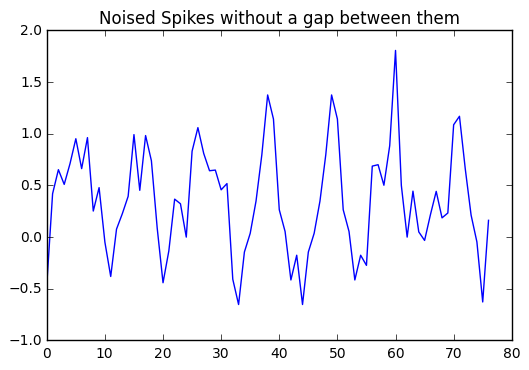

In [19]:
plt.title("Noised Spikes without a gap between them")
plt.plot(only_spikes) 

## RMS plot

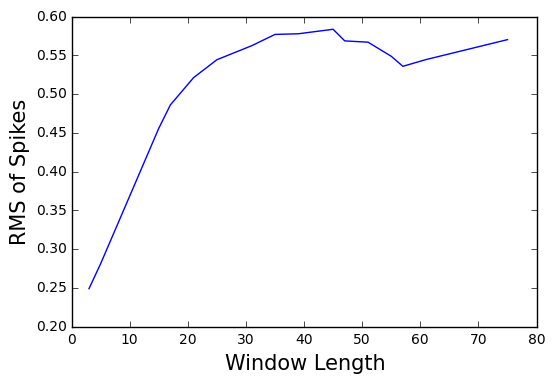

In [8]:
plt.plot(wl, valuesRms)
plt.xlabel("Window Length", size = 15)
plt.ylabel("RMS of Spikes", size = 15) 

## Euclidean Distance Plot

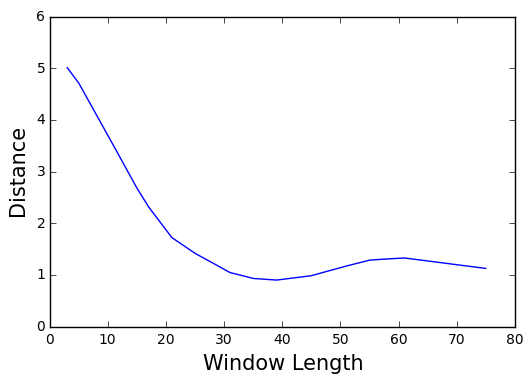

In [9]:
plt.plot(wl,valuesEuclid)
plt.xlabel("Window Length", size = 15)
plt.ylabel("Distance", size = 15) 

## Manhatten Distance Plot

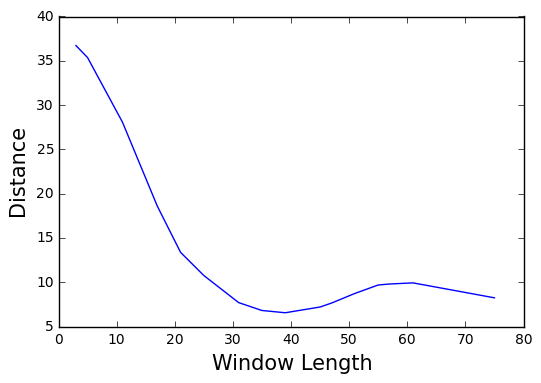

In [10]:
plt.plot(wl,valuesManhatten)
plt.xlabel("Window Length", size = 15)
plt.ylabel("Distance", size = 15) 

## Cosine similarity Plot

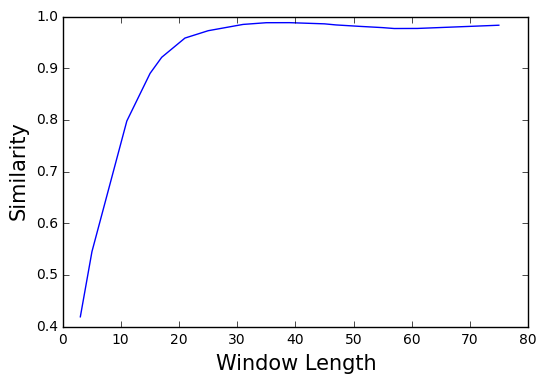

In [11]:
plt.plot(wl,valuesCosine)
plt.xlabel("Window Length", size = 15)
plt.ylabel("Similarity", size = 15) 

## Jaccard similarity Plot

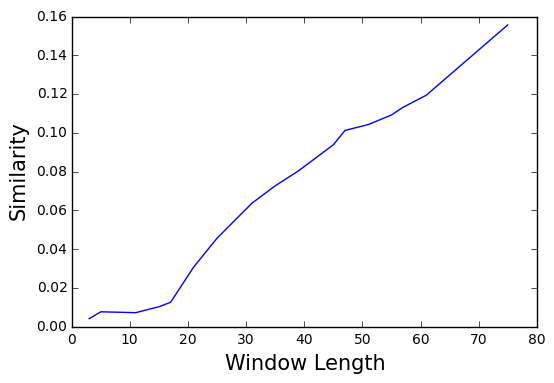

In [12]:
plt.plot(wl,valuesJaccard)
plt.xlabel("Window Length", size = 15)
plt.ylabel("Similarity", size = 15) 

## Correlation coefficient

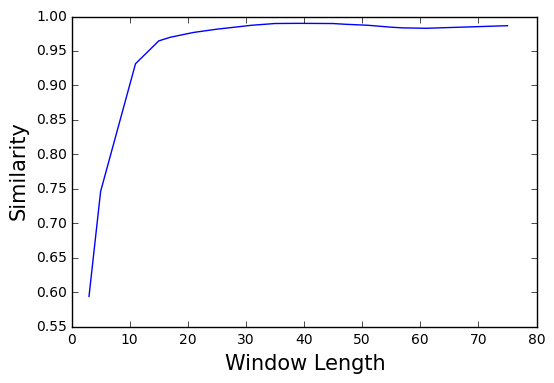

In [13]:
plt.plot(wl,valuesCorr)
plt.xlabel("Window Length", size = 15)
plt.ylabel("Similarity", size = 15) 